---
# <span style="color:blue">**Dense Network**</span>
---

---
### **Load merged training and validation data & test data**
---

In [1]:
import functions as fn

X_te, y_te, y_te_labels, test_features, te_filenames = fn.load_data('testfile_mobile_v2.npz', 'Test')
X_tr_merged, y_tr_merged, y_tr_labels_merged, train_features_merged, train_filenames_merged = fn.merge_tr_val_sets()

Test data info:
---------------
X: (50, 224, 224, 3)
y: (50, 6)
labels: (6,)
features: (50, 1280)
filenames (50,) 

Training data info:
-------------------
X: (280, 224, 224, 3)
y: (280, 6)
labels: (6,)
features: (280, 1280)
filenames (280,) 

Validation data info:
---------------------
X: (139, 224, 224, 3)
y: (139, 6)
labels: (6,)
features: (139, 1280)
filenames (139,) 

merged training and validation data info:
-----------------------------------------
X: (419, 224, 224, 3)
y: (419, 6)
labels: (6,)
features: (419, 1280)
filenames (419,) 



---
## **One dense layer**
---

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

model = Sequential()
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
# Fit model
history = model.fit(
    x=train_features_merged, y=y_tr_merged,
    validation_split=0.2, batch_size=32, epochs=50,
    shuffle=True # Shuffle training samples
)
model.summary()

Train on 335 samples, validate on 84 samples
Epoch 1/50
335/335 [==============================] - 0s 666us/step - loss: 1.3821 - acc: 0.5164 - val_loss: 1.4485 - val_acc: 0.4524
Epoch 2/50
335/335 [==============================] - 0s 58us/step - loss: 0.8039 - acc: 0.7642 - val_loss: 1.0267 - val_acc: 0.6905
Epoch 3/50
335/335 [==============================] - 0s 90us/step - loss: 0.5936 - acc: 0.8507 - val_loss: 0.8476 - val_acc: 0.7619
Epoch 4/50
335/335 [==============================] - 0s 90us/step - loss: 0.4796 - acc: 0.8776 - val_loss: 0.7528 - val_acc: 0.7619
Epoch 5/50
335/335 [==============================] - 0s 62us/step - loss: 0.4047 - acc: 0.8985 - val_loss: 0.6508 - val_acc: 0.7976
Epoch 6/50
335/335 [==============================] - 0s 76us/step - loss: 0.3559 - acc: 0.9104 - val_loss: 0.6094 - val_acc: 0.8095
Epoch 7/50
335/335 [==============================] - 0s 88us/step - loss: 0.3128 - acc: 0.9224 - val_loss: 0.5721 - val_acc: 0.8095
Epoch 8/50
335/335 [===

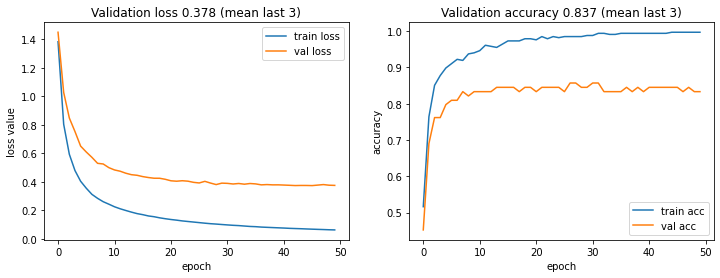

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history.history['acc'], label='train acc')
ax2.plot(history.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()


In [4]:
(test_loss, test_accuracy) = model.evaluate(test_features, y_te, batch_size=32)

print('Test loss: {:.2f}'.format(test_loss)) # around 0.19
print('Test accuracy: {:.2f}%'.format(100*test_accuracy)) # around 95%


50/50 [==============================] - 0s 74us/step
Test loss: 0.21
Test accuracy: 96.00%


---
#### **Save test accuracy**
---

In [5]:
fn.save_test_accuracy('1_layer_nn.csv','1_layer_nn', test_accuracy)

---
## **Two Dense layers**
---

In [6]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
# Fit model
history = model.fit(
    x=train_features_merged, y=y_tr_merged,
    validation_split=0.2, batch_size=32, epochs=50,
    shuffle=True # Shuffle training samples
)
model.summary()

Train on 335 samples, validate on 84 samples
Epoch 1/50
335/335 [==============================] - 0s 676us/step - loss: 1.5677 - acc: 0.4358 - val_loss: 1.4608 - val_acc: 0.3929
Epoch 2/50
335/335 [==============================] - 0s 85us/step - loss: 0.8845 - acc: 0.7493 - val_loss: 1.1650 - val_acc: 0.5952
Epoch 3/50
335/335 [==============================] - 0s 81us/step - loss: 0.6588 - acc: 0.8388 - val_loss: 0.9687 - val_acc: 0.7143
Epoch 4/50
335/335 [==============================] - 0s 95us/step - loss: 0.5205 - acc: 0.8866 - val_loss: 0.8079 - val_acc: 0.7738
Epoch 5/50
335/335 [==============================] - 0s 86us/step - loss: 0.4295 - acc: 0.9134 - val_loss: 0.7084 - val_acc: 0.7976
Epoch 6/50
335/335 [==============================] - 0s 142us/step - loss: 0.3636 - acc: 0.9343 - val_loss: 0.6455 - val_acc: 0.8095
Epoch 7/50
335/335 [==============================] - 0s 115us/step - loss: 0.3158 - acc: 0.9522 - val_loss: 0.5890 - val_acc: 0.7976
Epoch 8/50
335/335 [=

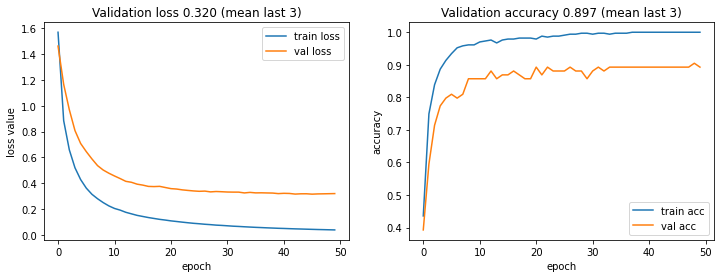

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history.history['acc'], label='train acc')
ax2.plot(history.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()


In [8]:
(test_loss, test_accuracy) = model.evaluate(test_features, y_te, batch_size=32)

print('Test loss: {:.2f}'.format(test_loss)) 
print('Test accuracy: {:.2f}%'.format(100*test_accuracy)) 


50/50 [==============================] - 0s 115us/step
Test loss: 0.27
Test accuracy: 92.00%


---
#### **Save test accuracy**
---

In [9]:
fn.save_test_accuracy('2_layer_nn.csv','2_layer_nn', test_accuracy)